In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03c_wn_720_800',
                          'ng_5',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_5',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.9_.5_.5_.5_.5',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_a3d1611',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03c_wn_720_800',
                          'ng_5',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_5',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.9_.5_.5_.5_.5',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_a3d1611',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 720

nband = 80

nv = 200

dv = 0.005

tsfc = 294.0

ng = 5

nref = 1

p_refs = (/ 600 /)

t_refs = (/ 250 /)

ng_refs = (/ 5 /)

data wgt
     &     /.9, 4 * .5/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 1

klin = 5e-25

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

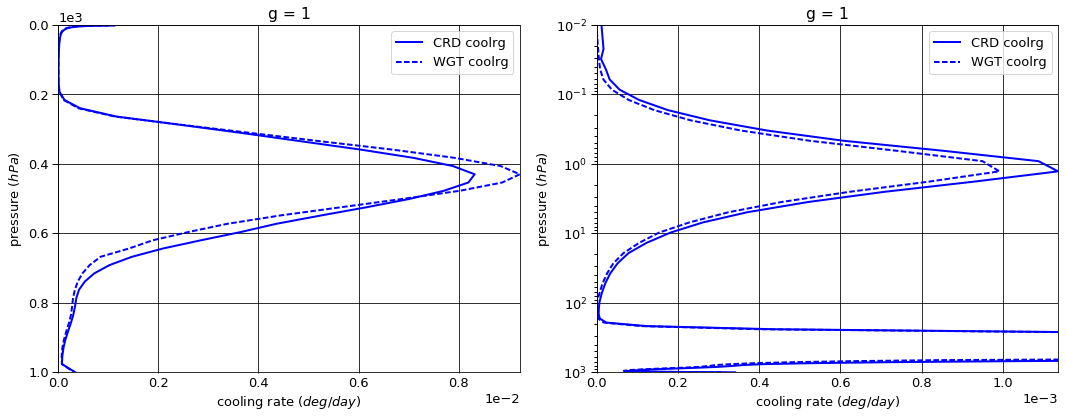

# Figure: cooling rate g-group 2

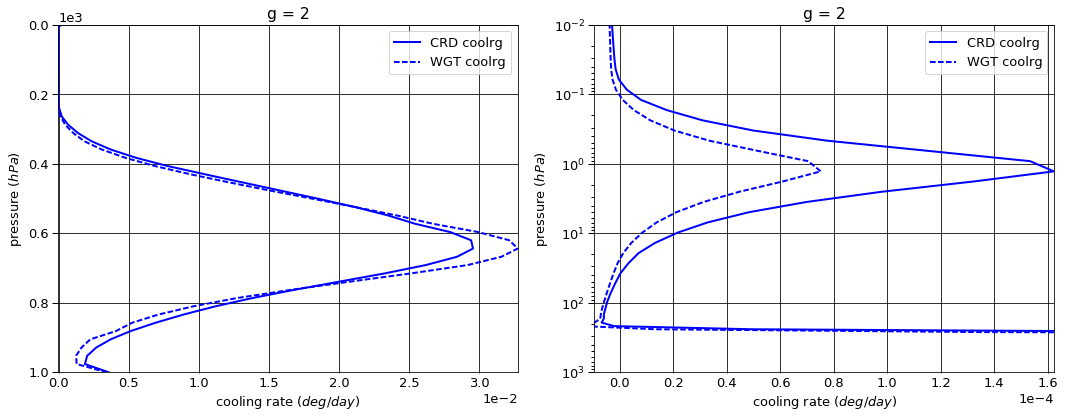

# Figure: cooling rate g-group 3

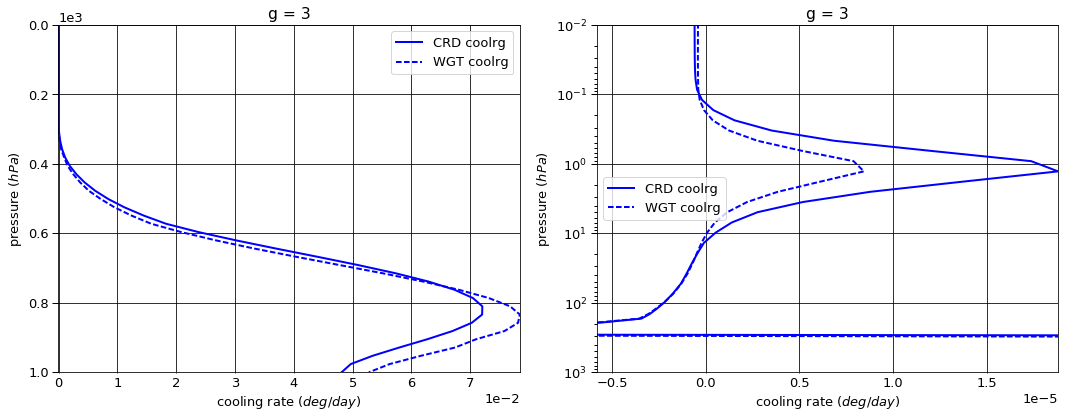

# Figure: cooling rate g-group 4

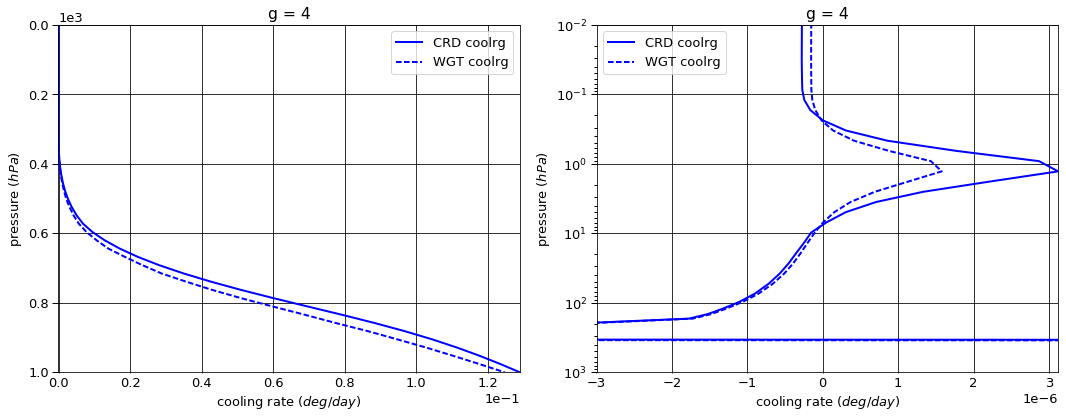

# Figure: cooling rate g-group 5

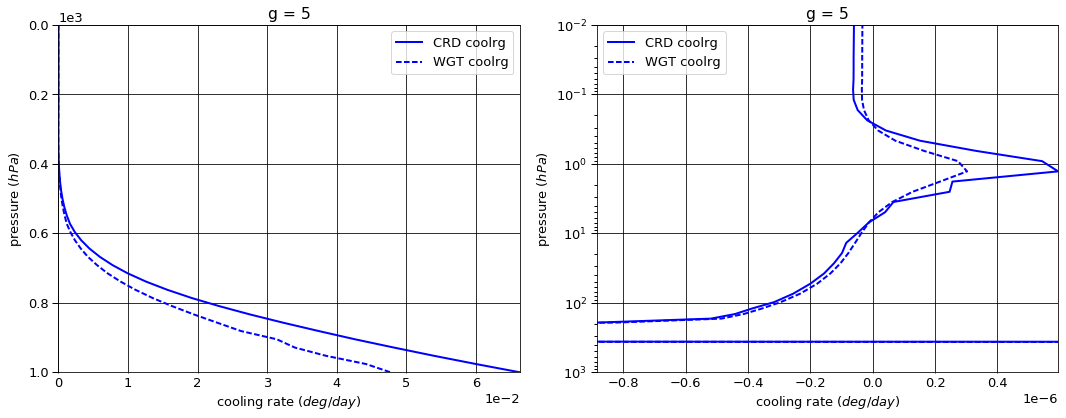

# Figure: cooling rate g-group total

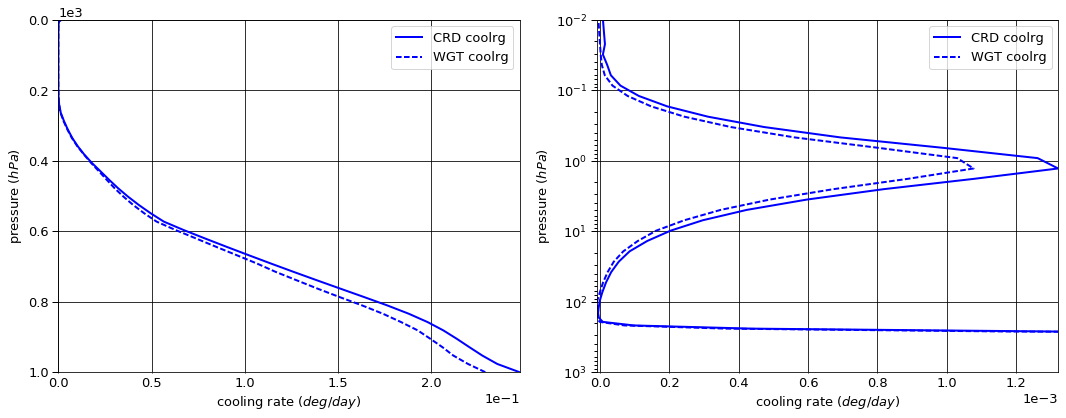

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -0.271164  0.000000  -0.271164
  1013.0   76     -0.504281  0.503392  -0.000889
2 0.0      1      -1.171545  0.000000  -1.171545
  1013.0   76     -1.690541  1.677799  -0.012742
3 0.0      1      -3.586963  0.000000  -3.586963
  1013.0   76     -4.186144  3.603471  -0.582673
4 0.0      1      -9.034885  0.000000  -9.034885
  1013.0   76     -9.448573  3.849371  -5.599201
5 0.0      1     -16.675551  0.000000 -16.675551
  1013.0   76    -16.808004  1.478629 -15.329375


WGT


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -0.264831  0.000000  -0.264831
  1013.0   76     -0.504281  0.503510  -0.000771
2 0.0      1      -1.171280  0.000000  -1.171280
  1013.0   76     -1.690541  1.679629  -0.010912
3 0.0      1      -3.605446  0.000000  -3.605446
  1013.0   76     -4.186144  3.691259  -0.494885
4 0.0      1      -9.089549  0.000000  -9.089549
  1013.0   76     -9.448573  3.437588  -6.010985
5 0.0      1     -16.711987  0.000000 -16.711987
  1013.0   76    -16.808004  1.059686 -15.748318


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.006333  0.000000  0.006333
  1013.0   76     0.000000  0.000118  0.000118
2 0.0      1      0.000265  0.000000  0.000265
  1013.0   76     0.000000  0.001830  0.001830
3 0.0      1     -0.018483  0.000000 -0.018483
  1013.0   76     0.000000  0.087788  0.087788
4 0.0      1     -0.054664  0.000000 -0.054664
  1013.0   76     0.000000 -0.411783 -0.411783
5 0.0      1     -0.036436  0.000000 -0.036436
  1013.0   76     0.000000 -0.418943 -0.418943

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -2.480801e-06
  1001.112500 75     3.411265e-04
2 0.000312    1     -4.632943e-06
  1001.112500 75     3.584563e-03
3 0.000312    1     -5.924702e-07
  1001.112500 75     4.811100e-02
4 0.000312    1     -2.658845e-07
  1001.112500 75     1.290216e-01
5 0.000312    1     -5.658241e-08
  1001.112500 75     6.633627e-02


WGT


coolrg
g pressure    layer              
1 0.000312    1     -1.266743e-05
  1001.112500 75     3.154976e-04
2 0.000312    1     -4.454721e-06
  1001.112500 75     3.433306e-03
3 0.000312    1     -3.951583e-07
  1001.112500 75     5.275264e-02
4 0.000312    1     -1.464034e-07
  1001.112500 75     1.247952e-01
5 0.000312    1     -3.107710e-08
  1001.112500 75     4.773503e-02


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -1.018663e-05
  1001.112500 75    -2.562884e-05
2 0.000312    1      1.782220e-07
  1001.112500 75    -1.512574e-04
3 0.000312    1      1.973119e-07
  1001.112500 75     4.641635e-03
4 0.000312    1      1.194811e-07
  1001.112500 75    -4.226410e-03
5 0.000312    1      2.550531e-08
  1001.112500 75    -1.860124e-02

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-30.740107,0.000000,-30.740107
1013.0,76,-32.637543,11.112662,-21.524881



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-30.843093,0.000000,-30.843093
1013.0,76,-32.637543,10.371671,-22.265872



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-0.102986,0.000000,-0.102986
1013.0,76,0.000000,-0.740991,-0.740991


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000008
1001.112500,75,0.247395



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.000018
1001.112500,75,0.229032



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000010
1001.112500,75,-0.018363


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.015500,0.015423
2,0.052000,0.051652
3,0.128688,0.127952
4,0.290063,0.289068
5,0.513750,0.515905


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,1.501949e-22
2,2.243039e-23
3,3.349798e-24
4,5.002654e-25
5,3.765264e-26


In [21]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [5]
    p_refs = [600]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,1.501949e-22,NaN,0.015500,0.015423,0.015500,0.015423,600.0
2,2.243039e-23,0.149342,0.052000,0.051652,0.067500,0.067075,600.0
3,3.349798e-24,0.149342,0.128688,0.127952,0.196188,0.195027,600.0
4,5.002654e-25,0.149342,0.290063,0.289068,0.486250,0.484095,600.0
5,3.765264e-26,0.075265,0.513750,0.515905,1.000000,1.000000,600.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [24]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                    
1     1     0.000312  2.345147e-22  7.706397e-24  30.431172
      2     0.000312  1.057558e-23  2.622546e-25  40.325601
      3     0.000312  1.992103e-25  1.407673e-26  14.151746
      4     0.000312  2.468853e-26  2.752583e-27   8.969220
      5     0.000312  2.808884e-27  1.678861e-28  16.730886
2     1     0.000750  2.359667e-22  7.722987e-24  30.553810
      2     0.000750  1.062494e-23  2.631795e-25  40.371467
      3     0.000750  2.013589e-25  1.411238e-26  14.268244
      4     0.000750  2.488456e-26  2.764746e-27   9.000670
      5     0.000750  2.832969e-27  1.686397e-28  16.798948
3     1     0.001052  2.390792e-22  7.755460e-24  30.827210
      2     0.001052  1.073103e-23  2.650279e-25  40.490164
      3     0.001052  2.059966e-25  1.418120e-26  14.526033
      4     0.001052  2.530567e-26  2.789819e-27   9.070720
      5     0.001052  2.884800e-27  1.701281e-28  16.956637
4     1     0.001476  2.424136e-22  7.790178e-24  31.117850
      2     0.001476  1.084503e-23  2.670282e-25  40.613801
      3     0.001476  2.110240e-25  1.425299e-26  14.805600
      4     0.001476  2.576001e-26  2.816763e-27   9.145252
      5     0.001476  2.940875e-27  1.717376e-28  17.124231
5     1     0.002070  2.457917e-22  7.825570e-24  31.408791
      2     0.002070  1.096091e-23  2.690885e-25  40.733483
      3     0.002070  2.161803e-25  1.432434e-26  15.091820
      4     0.002070  2.622383e-26  2.844252e-27   9.219939
      5     0.002070  2.998280e-27  1.733983e-28  17.291293
6     1     0.002904  2.492104e-22  7.861942e-24  31.698322
      2     0.002904  1.107859e-23  2.712253e-25  40.846435
      3     0.002904  2.214638e-25  1.439589e-26  15.383823
      4     0.002904  2.669700e-26  2.872390e-27   9.294351
      5     0.002904  3.057002e-27  1.751251e-28  17.456107
7     1     0.004074  2.526695e-22  7.899791e-24  31.984327
      2     0.004074  1.119808e-23  2.734642e-25  40.948963
      3     0.004074  2.268776e-25  1.446867e-26  15.680610
      4     0.004074  2.717986e-26  2.901359e-27   9.367978
      5     0.004074  3.117086e-27  1.769414e-28  17.616485
8     1     0.005714  2.561687e-22  7.939821e-24  32.263786
      2     0.005714  1.131938e-23  2.758413e-25  41.035861
      3     0.005714  2.324247e-25  1.454415e-26  15.980630
      4     0.005714  2.767279e-26  2.931411e-27   9.440094
      5     0.005714  3.178583e-27  1.788800e-28  17.769357
9     1     0.008015  2.597078e-22  7.983038e-24  32.532454
      2     0.008015  1.144254e-23  2.784081e-25  41.099881
      3     0.008015  2.381091e-25  1.462443e-26  16.281602
      4     0.008015  2.817632e-26  2.962908e-27   9.509684
      5     0.008015  3.241563e-27  1.809872e-28  17.910451
10    1     0.011243  2.632850e-22  8.030850e-24  32.784197
      2     0.011243  1.156751e-23  2.812368e-25  41.130860
      3     0.011243  2.439330e-25  1.471248e-26  16.580007
      4     0.011243  2.869091e-26  2.996353e-27   9.575280
      5     0.011243  3.306087e-27  1.833279e-28  18.033737
11    1     0.015771  2.668976e-22  8.085250e-24  33.010431
      2     0.015771  1.169426e-23  2.844298e-25  41.114754
      3     0.015771  2.498979e-25  1.481250e-26  16.870742
      4     0.015771  2.921715e-26  3.032455e-27   9.634817
      5     0.015771  3.372233e-27  1.859938e-28  18.130885
12    1     0.022122  2.705440e-22  8.149058e-24  33.199426
      2     0.022122  1.182279e-23  2.881329e-25  41.032406
      3     0.022122  2.560087e-25  1.493050e-26  17.146698
      4     0.022122  2.975607e-26  3.072242e-27   9.685458
      5     0.022122  3.440136e-27  1.891158e-28  18.190634
13    1     0.031031  2.742221e-22  8.226230e-24  33.335090
      2     0.031031  1.195310e-23  2.925525e-25  40.857947
      3     0.031031  2.622712e-25  1.507494e-26  17.397824
      4     0.031031  3.030910e-26  3.117171e-27   9.723271
      5     0.031031  3.509982e-27  1.928788e-28  18

# Histogram of wavenumbers in g-group 1

In [25]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [26]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
